In [807]:
import pandas as pd

In [808]:
rawData = pd.read_csv("../../../data/rawData/kosuli.mk/kosuli_casa_moda.csv")
rawData.head(10)

,Name,Price,Sizes,Image_URL,Product_URL
0,CM098 REGULAR FIT LONG SLEEVE BLUE,1500 ДЕН,"L, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm098-regular-fit-lo...
1,CM095 REGULAR FIT LONG SLEEVE SILVER,1500 ДЕН,XXL,https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm095-regular-fit-lo...
2,CM094 REGULAR FIT LONG SLEEVE RED/SILVER,1500 ДЕН,"XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm094-regular-fit-lo...
3,CM091 REGULAR FIT LONG SLEEVE BLUE/WHITE,1500 ДЕН,"L, XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm091-regular-fit-lo...
4,CM089 REGULAR FIT LONG SLEEVE ORANGE,1500 ДЕН,"XL, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm089-regular-fit-lo...
5,CM088 REGULAR FIT LONG SLEEVE RED,1500 ДЕН,"XL, XXL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm088-regular-fit-lo...
6,CM087 REGULAR FIT LONG SLEEVE,1500 ДЕН,XXL,https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm087-regular-fit-lo...
7,CM086 REGULAR FIT LONG SLEEVE BLUE,1500 ДЕН,"2XL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm086-regular-fit-lo...
8,CM083 REGULAR FIT LONG SLEEVE BLUE,1500 ДЕН,"L, XL, XXL, 4XL, 5XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm083-regular-fit-lo...
9,CM082 REGULAR FIT LONG SLEEVE RED,1500 ДЕН,"XXL, 5XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm082-regular-fit-lo...


In [809]:
rawData.isnull().sum()

Name           0
Price          0
Sizes          1
Image_URL      0
Product_URL    0
dtype: int64

In [810]:
#чистење и форматирање на текст во колоната 'Name' од DataFrame-от rawData
rawData['Name'] = rawData['Name'].str.strip().str.title()

In [811]:
rawData.head(5)

,Name,Price,Sizes,Image_URL,Product_URL
0,Cm098 Regular Fit Long Sleeve Blue,1500 ДЕН,"L, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm098-regular-fit-lo...
1,Cm095 Regular Fit Long Sleeve Silver,1500 ДЕН,XXL,https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm095-regular-fit-lo...
2,Cm094 Regular Fit Long Sleeve Red/Silver,1500 ДЕН,"XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm094-regular-fit-lo...
3,Cm091 Regular Fit Long Sleeve Blue/White,1500 ДЕН,"L, XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm091-regular-fit-lo...
4,Cm089 Regular Fit Long Sleeve Orange,1500 ДЕН,"XL, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm089-regular-fit-lo...


In [812]:
#ја чисти колоната Price, која моментално содржи цена заедно со валута како текст, на пример: "1200ден"
rawData[['Price_amount', 'Currency']] = (
    rawData['Price']
        .str.extract(r'([\d\.]+)\s*(\D+)', expand=True)
)

#ја конвертира колоната Price_amount од текст (string / object) во број со децимали (тип float)
rawData['Price_amount'] = rawData['Price_amount'].astype(float)


In [813]:
rawData.head(5)

,Name,Price,Sizes,Image_URL,Product_URL,Price_amount,Currency
0,Cm098 Regular Fit Long Sleeve Blue,1500 ДЕН,"L, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm098-regular-fit-lo...,1500.0,ДЕН
1,Cm095 Regular Fit Long Sleeve Silver,1500 ДЕН,XXL,https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm095-regular-fit-lo...,1500.0,ДЕН
2,Cm094 Regular Fit Long Sleeve Red/Silver,1500 ДЕН,"XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm094-regular-fit-lo...,1500.0,ДЕН
3,Cm091 Regular Fit Long Sleeve Blue/White,1500 ДЕН,"L, XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm091-regular-fit-lo...,1500.0,ДЕН
4,Cm089 Regular Fit Long Sleeve Orange,1500 ДЕН,"XL, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm089-regular-fit-lo...,1500.0,ДЕН


In [814]:
#Ги претвора колоните од Index објект во обична (изменлива) листа во Python
cols = list(rawData.columns)

#го менува името на втората колона (индекс 1) во листата cols и го поставува на 'Price_str'
cols[1] = 'Price_str'

# ги поставува новите имиња на колоните во DataFrame-от rawData, користејќи ја изменетата листа cols.
rawData.columns = cols

# брише (отстранува) колоната Price_str од табелата rawData
rawData = rawData.drop(columns=['Price_str'])


In [815]:
rawData.head(5)

,Name,Sizes,Image_URL,Product_URL,Price_amount,Currency
0,Cm098 Regular Fit Long Sleeve Blue,"L, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm098-regular-fit-lo...,1500.0,ДЕН
1,Cm095 Regular Fit Long Sleeve Silver,XXL,https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm095-regular-fit-lo...,1500.0,ДЕН
2,Cm094 Regular Fit Long Sleeve Red/Silver,"XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm094-regular-fit-lo...,1500.0,ДЕН
3,Cm091 Regular Fit Long Sleeve Blue/White,"L, XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm091-regular-fit-lo...,1500.0,ДЕН
4,Cm089 Regular Fit Long Sleeve Orange,"XL, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm089-regular-fit-lo...,1500.0,ДЕН


In [816]:
#rename на колоните на македонски
rawData = rawData.rename(columns={'Price_amount': 'Цена', 'Currency': 'Валута', 'Name':'Име', 'Sizes':'Величини', 'Image_URL':'Линк до слика на продукт', 'Product_URL':'Линк до продукт','Price':'Цена'})

In [817]:
rawData.head(4)

,Име,Величини,Линк до слика на продукт,Линк до продукт,Цена,Валута
0,Cm098 Regular Fit Long Sleeve Blue,"L, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm098-regular-fit-lo...,1500.0,ДЕН
1,Cm095 Regular Fit Long Sleeve Silver,XXL,https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm095-regular-fit-lo...,1500.0,ДЕН
2,Cm094 Regular Fit Long Sleeve Red/Silver,"XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm094-regular-fit-lo...,1500.0,ДЕН
3,Cm091 Regular Fit Long Sleeve Blue/White,"L, XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm091-regular-fit-lo...,1500.0,ДЕН


In [818]:
# конвертира колоната Цена од децимален број (float) во цел број (int)
rawData['Цена'] = rawData['Цена'].astype(int)

In [819]:
rawData.head(4)

,Име,Величини,Линк до слика на продукт,Линк до продукт,Цена,Валута
0,Cm098 Regular Fit Long Sleeve Blue,"L, XXL, 4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm098-regular-fit-lo...,1500,ДЕН
1,Cm095 Regular Fit Long Sleeve Silver,XXL,https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm095-regular-fit-lo...,1500,ДЕН
2,Cm094 Regular Fit Long Sleeve Red/Silver,"XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm094-regular-fit-lo...,1500,ДЕН
3,Cm091 Regular Fit Long Sleeve Blue/White,"L, XXL,",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm091-regular-fit-lo...,1500,ДЕН


In [820]:
# каде има празно за величини да ставе нема достпана величина 
rawData['Величини'] = rawData['Величини'].fillna('Нема достапна велчина')

In [821]:
rawData.isnull().sum()

Име                         0
Величини                    0
Линк до слика на продукт    0
Линк до продукт             0
Цена                        0
Валута                      0
dtype: int64

In [822]:
rawData['Величини'] = (
    rawData['Величини']
    .str.split(',')
    .apply(lambda lst: [s.strip().upper() for s in lst])
)

In [823]:
rawData.head(4)

,Име,Величини,Линк до слика на продукт,Линк до продукт,Цена,Валута
0,Cm098 Regular Fit Long Sleeve Blue,"[L, XXL, 4XL]",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm098-regular-fit-lo...,1500,ДЕН
1,Cm095 Regular Fit Long Sleeve Silver,[XXL],https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm095-regular-fit-lo...,1500,ДЕН
2,Cm094 Regular Fit Long Sleeve Red/Silver,"[XXL, ]",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm094-regular-fit-lo...,1500,ДЕН
3,Cm091 Regular Fit Long Sleeve Blue/White,"[L, XXL, ]",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm091-regular-fit-lo...,1500,ДЕН


In [826]:
size_map = {
    'SMALL': 'S',
    'MEDIUM': 'M',
    'LARGE': 'L',
    'EXTRA SMALL': 'XS',
    'EXTRA LARGE': 'XL',
    'EXTRA EXTRA LARGE': 'XXL',
    'EXTRA EXTRA EXTRA LARGE': '3XL',
    'EXTRA EXTRA EXTRA EXTRA LARGE': '4XL',
    'EXTRA EXTRA EXTRA EXTRA EXTRA LARGE': '5XL'
}
rawData['Величини'] = rawData['Величини'].apply(lambda lst: [size_map.get(s, s) for s in lst])

In [827]:
size_map

{'SMALL': 'S',
 'MEDIUM': 'M',
 'LARGE': 'L',
 'EXTRA SMALL': 'XS',
 'EXTRA LARGE': 'XL',
 'EXTRA EXTRA LARGE': 'XXL',
 'EXTRA EXTRA EXTRA LARGE': '3XL',
 'EXTRA EXTRA EXTRA EXTRA LARGE': '4XL',
 'EXTRA EXTRA EXTRA EXTRA EXTRA LARGE': '5XL'}

In [828]:
# проверува дали почнува со http or https ако не почнува додава
def ensure_http(url):
    url = str(url).strip()
    if not url.lower().startswith(('http://', 'https://')):
        return 'http://' + url
    return url

rawData['Линк до слика на продукт']   = rawData['Линк до слика на продукт'].apply(ensure_http)
rawData['Линк до продукт	'] = rawData['Линк до продукт'].apply(ensure_http)

In [829]:
#ја зема колоната „Величини“, ја претвора од стринг кој изгледа како листа во вистинска листа, ги чисти
#празните места од секој елемент, и ги спојува елементите во еден стринг одделен со запирки.
#Потоа го зачувува прочистениот податок во нов CSV фајл.
import ast

def clean_sizes(val):
    if isinstance(val, str):
        try:
            lst = ast.literal_eval(val)
        except Exception:
            return val        
    elif isinstance(val, list):
        lst = val
    else:
        return val               

    lst = [s.strip() for s in lst if isinstance(s, str) and s.strip()]

    return ",".join(lst)

rawData['Величини'] = rawData['Величини'].apply(clean_sizes)

rawData.to_csv('kosuli_casa_moda_cleaned.csv', index=False)

In [831]:
cleanedData = pd.read_csv("kosuli_casa_moda_cleaned.csv")
cleanedData.head(5)

,Име,Величини,Линк до слика на продукт,Линк до продукт,Цена,Валута,Линк до продукт\t
0,Cm098 Regular Fit Long Sleeve Blue,"L,XXL,4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm098-regular-fit-lo...,1500,ДЕН,https://kosuli.mk/product/cm098-regular-fit-lo...
1,Cm095 Regular Fit Long Sleeve Silver,XXL,https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm095-regular-fit-lo...,1500,ДЕН,https://kosuli.mk/product/cm095-regular-fit-lo...
2,Cm094 Regular Fit Long Sleeve Red/Silver,XXL,https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm094-regular-fit-lo...,1500,ДЕН,https://kosuli.mk/product/cm094-regular-fit-lo...
3,Cm091 Regular Fit Long Sleeve Blue/White,"L,XXL",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm091-regular-fit-lo...,1500,ДЕН,https://kosuli.mk/product/cm091-regular-fit-lo...
4,Cm089 Regular Fit Long Sleeve Orange,"XL,XXL,4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm089-regular-fit-lo...,1500,ДЕН,https://kosuli.mk/product/cm089-regular-fit-lo...


In [832]:
cleanedData = cleanedData.drop(columns=['Линк до продукт\t'])

In [833]:
cleanedData

,Име,Величини,Линк до слика на продукт,Линк до продукт,Цена,Валута
0,Cm098 Regular Fit Long Sleeve Blue,"L,XXL,4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm098-regular-fit-lo...,1500,ДЕН
1,Cm095 Regular Fit Long Sleeve Silver,XXL,https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm095-regular-fit-lo...,1500,ДЕН
2,Cm094 Regular Fit Long Sleeve Red/Silver,XXL,https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm094-regular-fit-lo...,1500,ДЕН
3,Cm091 Regular Fit Long Sleeve Blue/White,"L,XXL",https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm091-regular-fit-lo...,1500,ДЕН
4,Cm089 Regular Fit Long Sleeve Orange,"XL,XXL,4XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm089-regular-fit-lo...,1500,ДЕН
5,Cm088 Regular Fit Long Sleeve Red,"XL,XXL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm088-regular-fit-lo...,1500,ДЕН
6,Cm087 Regular Fit Long Sleeve,XXL,https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm087-regular-fit-lo...,1500,ДЕН
7,Cm086 Regular Fit Long Sleeve Blue,2XL,https://kosuli.mk/wp-content/uploads/2021/05/A...,https://kosuli.mk/product/cm086-regular-fit-lo...,1500,ДЕН
8,Cm083 Regular Fit Long Sleeve Blue,"L,XL,XXL,4XL,5XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm083-regular-fit-lo...,1500,ДЕН
9,Cm082 Regular Fit Long Sleeve Red,"XXL,5XL",https://kosuli.mk/wp-content/uploads/2021/05/W...,https://kosuli.mk/product/cm082-regular-fit-lo...,1500,ДЕН


In [834]:
cleanedData.to_csv('kosuli_casa_moda_cleaned.csv', index=False)

In [835]:
import pandas as pd
import json

In [836]:
stand_data = pd.read_csv('kosuli_casa_moda_cleaned.csv')

In [837]:
#Оваа функција зема вредност од колоната „Величини“, ја претвора во стринг, ја дели по запирка, ги чисти празните места, 
#потоа ја филтрира листата да ги задржи само дозволените големини (како XS, S, M, L, XL итн.) 
#и на крај ги спојува во еден стринг одделен со запирки.
import re

def clean_sizes(cell):
    parts = str(cell).split(',')
    parts = [p.strip() for p in parts if p.strip()]
    allowed = {'XS','S','M','L','XL','XXL','3XL','4XL','5XL'}
    parts = [p for p in parts if p.upper() in allowed]
    return ",".join(parts)

stand_data['Величини'] = stand_data['Величини'].apply(clean_sizes)

In [839]:
def show_plot():
    plt.tight_layout()
    plt.show()

In [840]:
import matplotlib.pyplot as plt

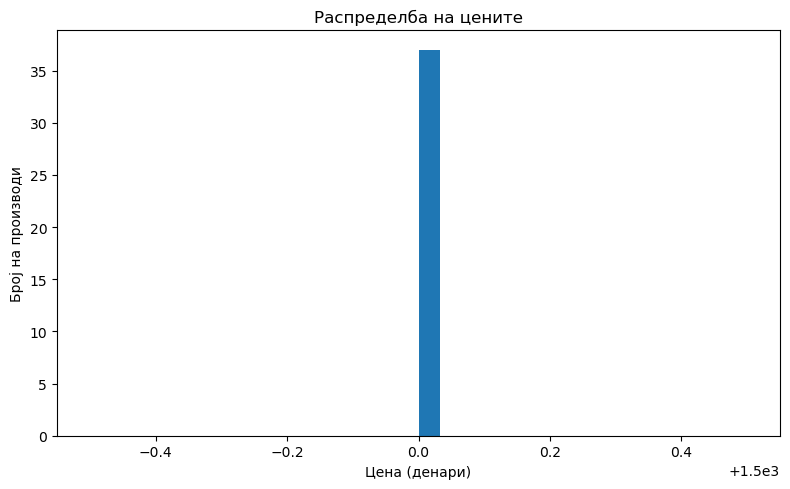

In [841]:
#Хистограм на цените
plt.figure(figsize=(8, 5))
plt.hist(cleanedData['Цена'].dropna(), bins=30)
plt.title('Распределба на цените')
plt.xlabel('Цена (денари)')
plt.ylabel('Број на производи')
show_plot()

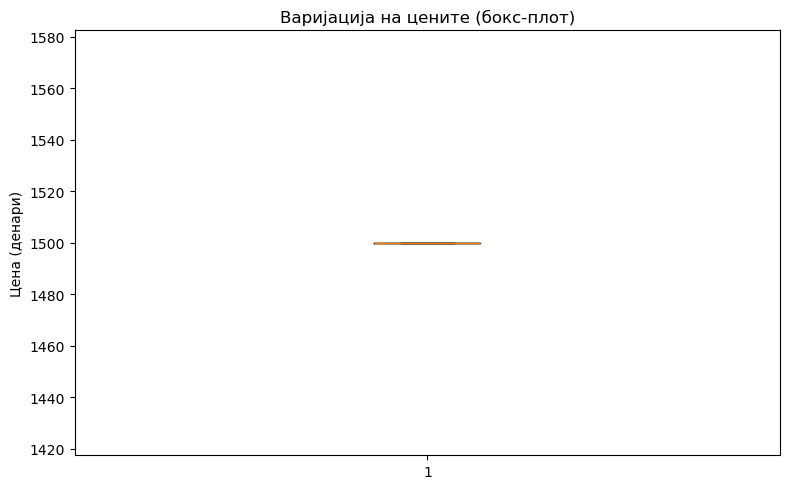

In [842]:
#Бокс-плот на цените
plt.figure(figsize=(8, 5))
plt.boxplot(cleanedData['Цена'].dropna(), vert=True)
plt.title('Варијација на цените (бокс-плот)')
plt.ylabel('Цена (денари)')
show_plot()

In [843]:
cleanedData['Величини_list'] = cleanedData['Величини'].apply(ast.literal_eval)

# 3. Додавање нова колона: број на достапни величини
cleanedData['Број_величини'] = cleanedData['Величини_list'].apply(len)

SyntaxError: invalid decimal literal (<unknown>, line 1)

In [ ]:
#Хистограм на бројот на достапни величини
plt.figure(figsize=(8, 5))
plt.hist(cleanedData['Број_величини'], bins=range(1, cleanedData['Број_величини'].max() + 2))
plt.title('Распределба на број на достапни величини')
plt.xlabel('Број на величини')
plt.ylabel('Број на производи')
show_plot()

In [ ]:
#Скатер-плот: цена vs. број на величини
plt.figure(figsize=(8, 5))
plt.scatter(cleanedData['Број_величини'], cleanedData['Цена'])
plt.title('Цена vs. број на достапни величини')
plt.xlabel('Број на величини')
plt.ylabel('Цена (денари)')
show_plot()

In [ ]:
#Дијаграм на фреквенција на достапни величини
all_sizes = [size for sublist in cleanedData['Величини_list'] for size in sublist]
size_counts = pd.Series(all_sizes).value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(size_counts.index, size_counts.values)
plt.title('Фреквенција на достапни величини')
plt.xlabel('Величина')
plt.ylabel('Број појавувања')
plt.xticks(rotation=45)
show_plot()